# Prova 2:Exercicio 2

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab

Planta do sistema: 
$\left\{\begin{matrix} \dot{x} = -5 \cdot x + b \cdot z - \mu \cdot u \\ \mu \cdot \dot{z} = -z + 10 \cdot u \\
y = z \end{matrix}\right.$

Modelo de referência: $\dot{x}_m = -x_m + r$

In [27]:
# Parametros
b = 1       
a = -5
am = 1
bm = 1

In [28]:
# Parâmetros de simulação
N = 5
dt = 0.00001  # Taxa de amostragem
gamma = 10*np.ones(2)
T = np.arange(0, N + dt, dt)

r = 10*np.ones(len(T))  # Referência
# r = np.sin(np.pi*T)  # Referência

len(r)

500001

In [29]:
l = np.ones((1, len(T)))[0] 
x = np.ones((len(T)))
xm = np.ones((1, len(T)))[0]

u = np.zeros((1, len(T)))[0]
e = np.zeros((1, len(T)))[0]

l[0] = 1
x[0] = 3
xm[0] = 2

x.shape, xm.shape, l.shape

((500001,), (500001,), (500001,))

In [30]:
# simulação de xm, x e l 
for k in range(0, int(N/dt)): 
    u[k] = l[k] * r[k]
    x[k+1] = x[k] + dt * (a * x[k] + b * u[k])
    xm[k+1] = xm[k] + dt * (- am * xm[k] + bm * r[k])

    e[k] = x[k] - xm[k]
    l[k+1] = l[k] - dt * (gamma[1]*e[k]*r[k]*np.sign(b))


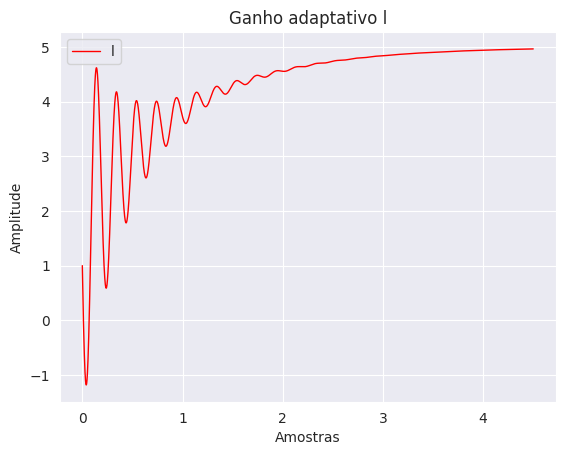

In [31]:
# Gráfico das respostas de yp e ym com entrada de referência r
corte = int(np.ceil(0.9*(len(T))))
plt.plot(T[:corte], l[:corte], label='l', color='red', linewidth=1)

plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Ganho adaptativo l')

plt.legend()

plt.show()

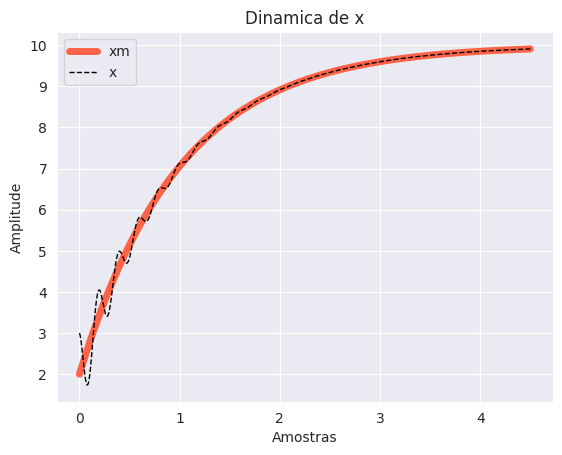

In [32]:
# Gráfico das respostas de yp e ym com entrada de referência r
corte = int(np.ceil(0.9*(len(T))))
plt.plot(T[:corte], xm[:corte], label='xm', color='tomato', linewidth=5)
plt.plot(T[:corte], x[:corte], label='x', color='black', linewidth=1, linestyle='--')

plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Dinamica de x')

plt.legend()

plt.show()